In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from functools import partial

[array([0.07072019]), array([0.92928022])]


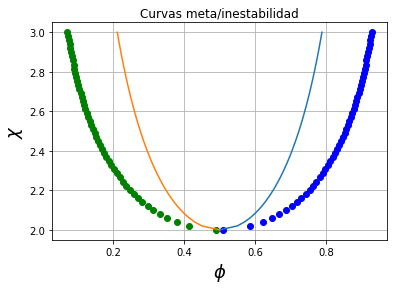

In [3]:
def fun(a,x):
    return a*x*(1-x) + x*np.log(x) + (1-x)*np.log(1-x)

def root_p(chi):
    if chi <= 2:
        return 1/2
    return 0.5*(1 + np.sqrt(1-2/chi))

def root_m(chi):
    if chi <= 2:
        return 1/2
    return 0.5*(1 - np.sqrt(1-2/chi))
    

a_vals = np.linspace(2,3)
x = np.linspace(0.05,0.95)

root_p_arr = [root_p(a_i) for a_i in a_vals]
root_m_arr = [root_m(a_i) for a_i in a_vals]

for a_i in a_vals:
    
    min_func = lambda x: fun(a_i, x)
    
    res = [minimize(min_func, x0=0.4, bounds=[(0.01,0.999)]).x, minimize(min_func, x0=0.6, bounds=[(0.05,0.95)]).x]
    plt.plot(res[0],a_i,'go')
    plt.plot(res[1],a_i,'bo')
print(res)

plt.ylabel('$\chi$', fontsize=18)
plt.xlabel('$\phi$', fontsize=18)
plt.plot(root_p_arr, a_vals)
plt.plot(root_m_arr, a_vals)
plt.title('Curvas meta/inestabilidad')
plt.grid()
plt.savefig('curvas_estabilidad.pdf')
plt.show()
